## US Accidents Analysis

![](https://i.imgur.com/TrRpQ9u.jpg)

In [100]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Loading Data

In [20]:
df = pd.read_csv("US_Accidents_Dec20_Updated.csv")

### Exploring Data

In [7]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,...,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [8]:
# checking the name and number of columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
#getting a general info on data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
#getting info on numerical data
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [10]:
## Getting all the numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

In [11]:
len(numeric_df.columns)

14

this shows that 14 of the columns are numeric and the rest are categorical


### Cleaning Data

In [14]:
#Percentage of missing values per column
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Sunrise_Sunset           0.000038
Civil_Twilight           0.000038
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
City                     0.000037
Country                  0.000000
Junction                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop          

In [10]:
# checking the type of missing percentages variable type in order to make a graph out of it
type(missing_percentages)

pandas.core.series.Series

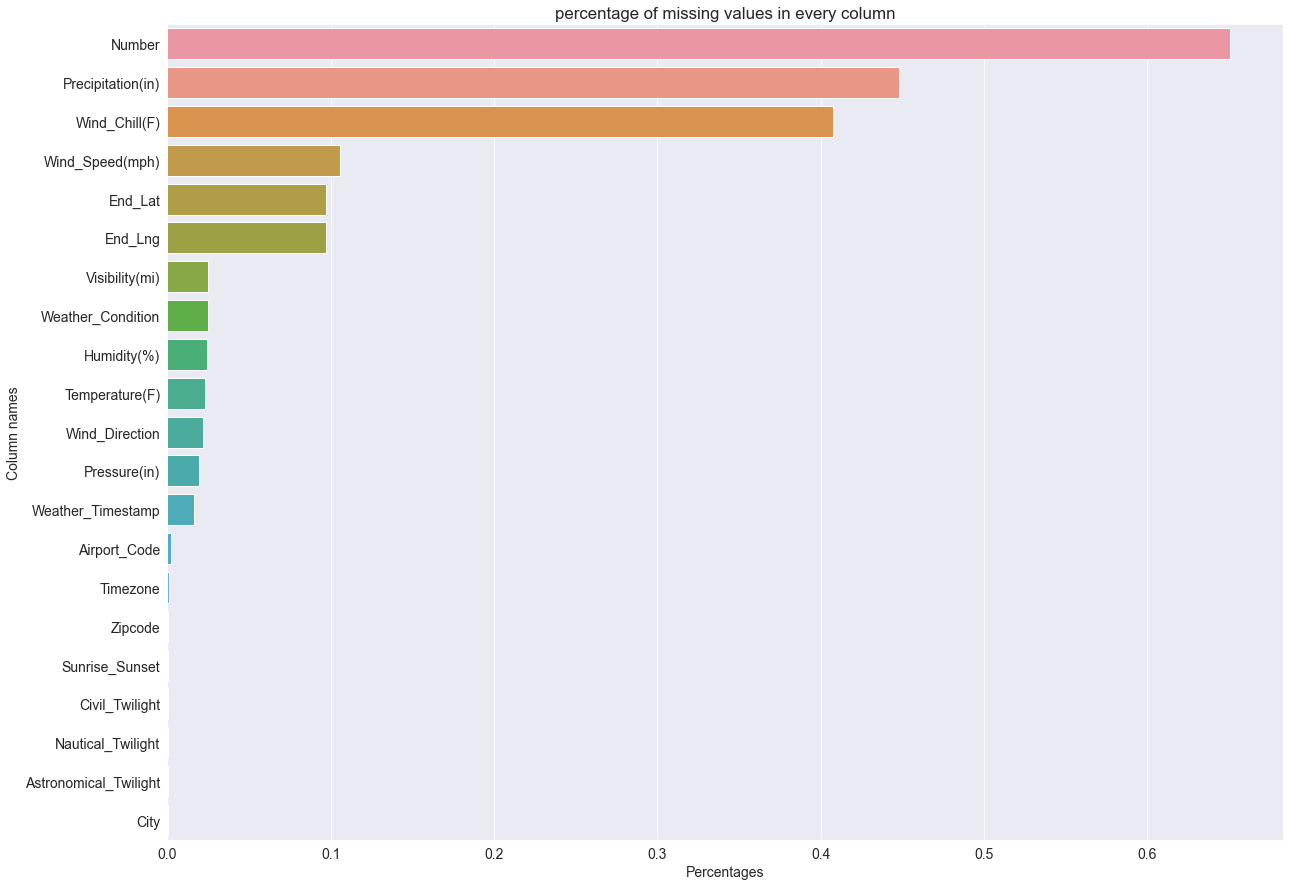

In [11]:
# creating a graph of percentage of missing values in every column

plt.figure (figsize = (20 , 15))
sns.barplot(x=missing_percentages[missing_percentages != 0], y=missing_percentages[missing_percentages != 0].index)

plt.title("percentage of missing values in every column")
plt.ylabel("Column names");
plt.xlabel('Percentages');

Columns with more than 50% of missing can be dropped if we want to decrease the volume of data

In [109]:
weather_condition = df.Weather_Condition.unique().astype('str')
weather_condition.sort()
weather_condition

array(['Blowing Dust', 'Blowing Dust / Windy', 'Blowing Sand',
       'Blowing Snow', 'Blowing Snow / Windy', 'Clear', 'Cloudy',
       'Cloudy / Windy', 'Drifting Snow', 'Drizzle', 'Drizzle / Windy',
       'Drizzle and Fog', 'Dust Whirls', 'Fair', 'Fair / Windy', 'Fog',
       'Fog / Windy', 'Freezing Drizzle', 'Freezing Rain',
       'Freezing Rain / Windy', 'Funnel Cloud', 'Hail', 'Haze',
       'Haze / Windy', 'Heavy Blowing Snow', 'Heavy Drizzle',
       'Heavy Freezing Drizzle', 'Heavy Freezing Rain',
       'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain / Windy',
       'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet',
       'Heavy Smoke', 'Heavy Snow', 'Heavy Snow / Windy',
       'Heavy Snow with Thunder', 'Heavy T-Storm',
       'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Rain',
       'Heavy Thunderstorms and Snow',
       'Heavy Thunderstorms with Small Hail', 'Ice Pellets',
       'Light Blowing Snow', 'Light Drizzle', 'Light Drizzle / Windy',
       'Light

since some entries are similar we can make changes to Weather_Condition to lower down the number of unique variables for better analysis

In [110]:
df.Weather_Condition = df.Weather_Condition.replace('Thunder','Thunderstorm')
df.Weather_Condition = df.Weather_Condition.replace('T-Storm','Thunderstorm')

df.Weather_Condition = df.Weather_Condition.replace('T-Storm / Windy','Thunderstorm / Windy')
df.Weather_Condition = df.Weather_Condition.replace('Thunder / Windy','Thunderstorm / Windy')

df.Weather_Condition = df.Weather_Condition.replace('Heavy Rain Shower','Heavy Rain')
df.Weather_Condition = df.Weather_Condition.replace('Heavy Rain Showers','Heavy Rain')

df.Weather_Condition = df.Weather_Condition.replace('Light Rain Shower','Light Rain')
df.Weather_Condition = df.Weather_Condition.replace('Light Rain Showers','Light Rain')

df.Weather_Condition = df.Weather_Condition.replace('Rain Shower','Rain')
df.Weather_Condition = df.Weather_Condition.replace('Rain Showers','Rain')

the start time column has all the info about the year, month, day and time of the day the accident have happend, we can split it to better use this column

In [127]:
#splitting the column "start time" to more usable time format
df["year"]=pd.DatetimeIndex(df["Start_Time"]).year

df["month"]=pd.DatetimeIndex(df["Start_Time"]).month

df["dayofweek"]=pd.DatetimeIndex(df["Start_Time"]).dayofweek

df["day"]=pd.DatetimeIndex(df["Start_Time"]).day

In [129]:
#checking to see the new columns have been added correctly
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'year', 'month', 'dayofweek', 'day'],
      dtype='object')

### Analyzing Data

### Analysis related to the cities and states in the data set

In [12]:
#checking how many cities are in the data set
cities = df.City.unique()
len(cities)

11790

#### Cities with highest number of accidents

Data is coming from 11790 unique cities in USA.

In [15]:
# checking a couple of the cities to get familiar with it
cities[:100]

array(['Greenville', 'Charlotte', 'Los Gatos', 'Carson City',
       'Fort Lauderdale', 'Rifle', 'Whittier', 'Franklin', 'Valencia',
       'Dover', 'Yonkers', 'Garland', 'Tucson', 'Oakland', 'Houston',
       'Los Angeles', 'Fontana', 'Saint Clair Shores',
       'Hopewell Junction', 'Atlanta', 'Fuquay Varina', 'Daleville',
       'Martinez', 'North Charleston', 'Austin', 'Seal Beach',
       'Cedar Springs', 'Miami', 'Corfu', 'Indianapolis', 'Baton Rouge',
       'Grand Terrace', 'Providence Forge', 'Tempe', 'Pittsford',
       'Pittsburgh', 'Sacramento', 'Latham', 'Homosassa', 'Fort Worth',
       'Redding', 'Downey', 'Minneapolis', 'Lake Worth', 'Grand Rapids',
       'Aldrich', 'Richmond', 'North Highlands', 'Dublin', 'Stafford',
       'Doswell', 'Flint', 'Ballston Spa', 'Baldwin Park',
       'Monroe Township', 'Dallas', 'El Paso', 'Jacksonville',
       'Moreno Valley', 'Summerfield', 'Phoenix', 'San Diego',
       'Capitol Heights', 'East Hartford', 'Lafayette', 'Calpine',
   

To make the analysis more meaningful we are going to find cities with highest number of accident and check them

In [15]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles     68411
Houston         68265
Charlotte       56176
Miami           49965
Dallas          48525
                ...  
Carbon              1
Davisboro           1
Emerald Isle        1
Bottineau           1
Zionville           1
Name: City, Length: 11789, dtype: int64

In [16]:
# finding cities with more than 10k accidents during the 4 year period 

high_accident_cities = cities_by_accident.loc[lambda x : x>10000]

In [17]:
# lists of cities with high number of accidents
high_accident_cities

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
Austin             38808
Raleigh            31355
Atlanta            29244
Sacramento         28984
Orlando            28092
Nashville          25277
Baton Rouge        25080
Minneapolis        22469
San Diego          22329
Phoenix            21370
Oklahoma City      21292
Portland           19432
Richmond           18343
Seattle            17384
Saint Paul         17266
San Jose           16744
Chicago            16571
Jacksonville       16210
San Antonio        15751
Denver             14272
Indianapolis       13671
Tucson             13526
Columbia           13326
Greenville         12925
Riverside          12359
Oakland            12170
Tampa              11758
Rochester          11715
Detroit            10909
Fort Lauderdale    10764
Kansas City        10636
Omaha              10568
Salt Lake City     10532
Dayton             10236
Name: City, dtype: int64

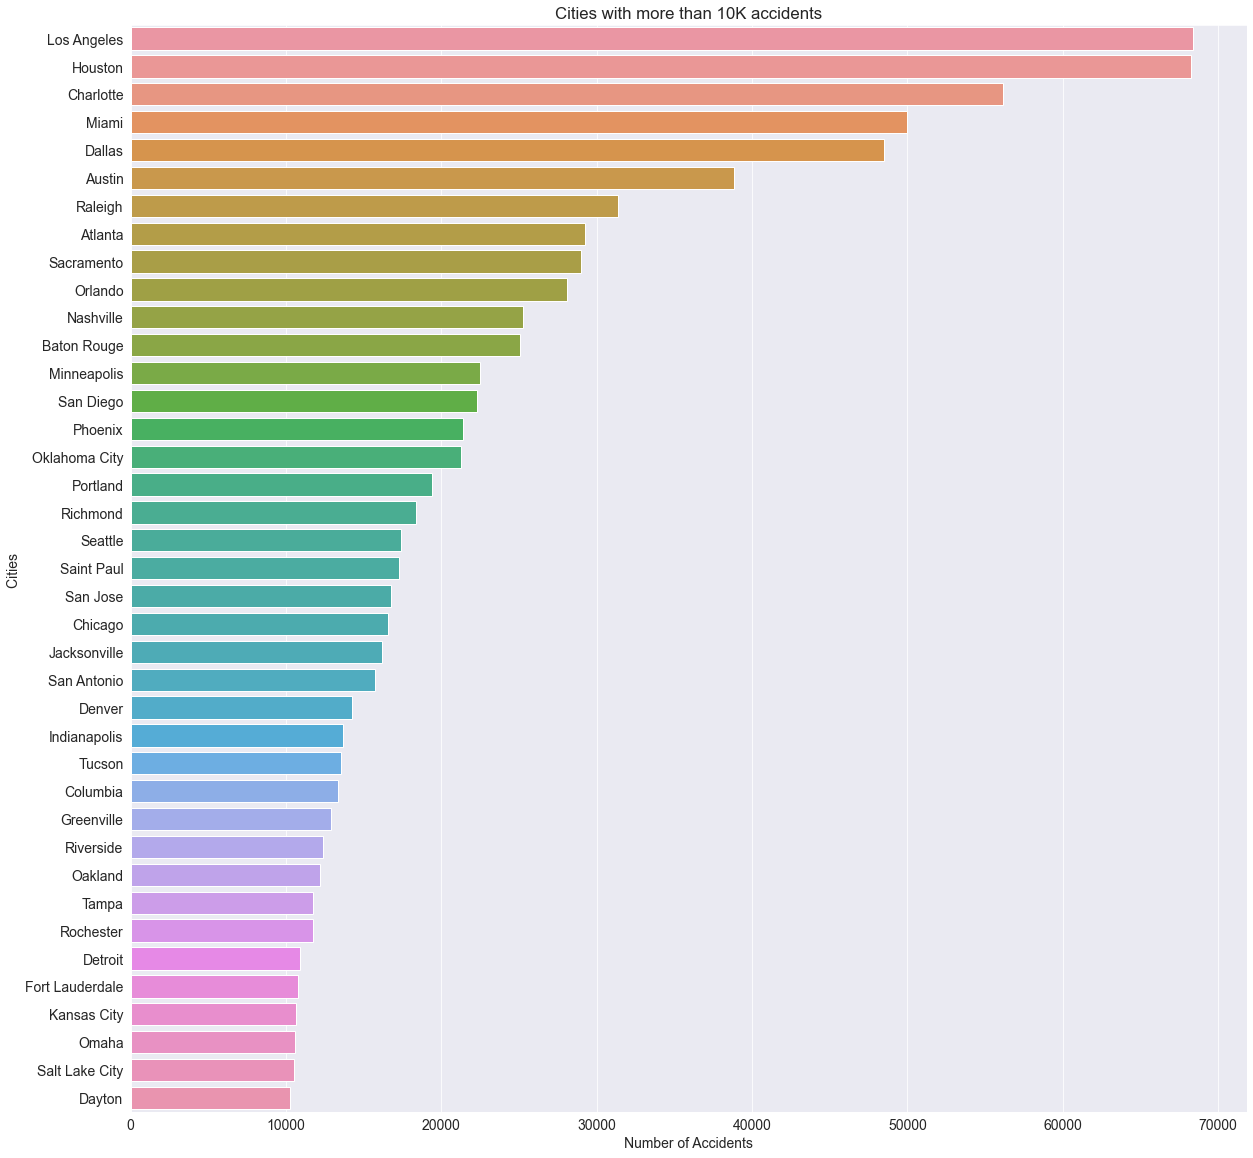

In [18]:
# creating a graph of Cities with more than 10K accidents

plt.figure (figsize = (20 , 20))
sns.barplot(x = high_accident_cities, y = high_accident_cities.index)

plt.title("Cities with more than 10K accidents")
plt.ylabel("Cities ");
plt.xlabel('Number of Accidents');

#### Cities with atleast one accident a day

checking the percentage of cities with more than 1500 accidents
since we have 4 years of data and 365 days in year 
counting for atleast 1 accident per day would be around 1500 accidents recorded

In [72]:
one_per_day_cities = cities_by_accident.loc[lambda x : x>1500]
len(one_per_day_cities)

296

In [74]:
# the percent of cities with atleast one accident a day 
len(one_per_day_cities)/len(cities_by_accident)*100

2.5108151666808043

only around 2.5 percent of the cities have this situation 

#### Map of accidents, color code by City

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

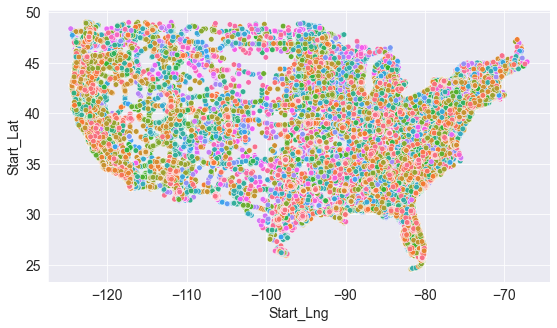

In [19]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='City', legend=False, s=30)

#### States with highest accidents reporting

In [102]:
#number of accidents per city
state_count = pd.value_counts(df['State'])

In [103]:
state_count

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
UT     46897
CO     37280
OK     35105
AL     33290
MO     28674
MA     25121
IN     24993
CT     24054
KY     15296
WI     14669
NE     13678
IA      9492
RI      8314
NV      7812
KS      7444
NH      6250
MS      5419
DC      5201
AR      4726
DE      4625
ID      4165
NM      3973
WV      3421
MT      3333
ME      2266
VT       555
ND       463
WY       419
SD       217
Name: State, dtype: int64

In [108]:



fig = go.Figure(data=go.Choropleth(
    locations=state_count.index,
    z = state_count.values.astype(float), 
    locationmode = 'USA-states',   
    colorscale = 'Aggrnyl',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa',
)

fig.show()

### Analysis related to the weather in the data set

#### number of accidents in different weather temperatures

temperature below 50 F is considered cold weather 
temperature above 90 F is considered hot weather 
between these two numbers is a normal weather temperature

In [58]:
cold_temp_count = len(df[df['Temperature(F)'] <= 50.0])

In [59]:
hot_temp_count = len(df[df['Temperature(F)'] >= 90.0])

In [52]:
null_temp = df['Temperature(F)'].isnull().sum()

In [60]:
normal_temp_count = len(df) - (hot_temp_count + cold_temp_count + null_temp)

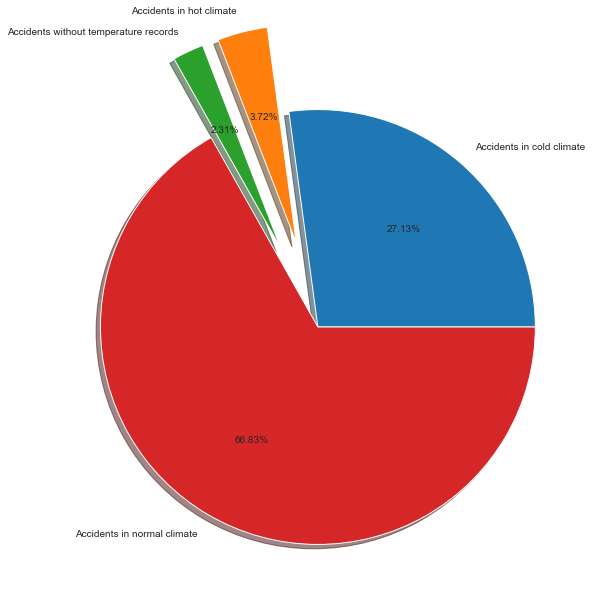

In [73]:
plt.figure(figsize=(10,10))
lab = ['Accidents in cold climate', 
       'Accidents in hot climate', 
       'Accidents without temperature records',
      "Accidents in normal climate"]
plt.pie([cold_temp_count, hot_temp_count,
         null_temp, normal_temp_count], labels = lab , autopct = '%0.2f%%', shadow = True, 
        explode = [0,0.4,0.4,0], textprops={'fontsize': 10})
plt.show()

####  Calculating the number of accidents on certain weather condition.


In [111]:
# number of accidents per weather
weather_by_accident = df.Weather_Condition.value_counts()
weather_by_accident

Fair                         692680
Clear                        498925
Mostly Cloudy                386122
Partly Cloudy                268851
Cloudy                       245054
                              ...  
Sand / Dust Whirls Nearby         1
Rain and Sleet                    1
Mist / Windy                      1
Heavy Smoke                       1
Heavy Freezing Drizzle            1
Name: Weather_Condition, Length: 119, dtype: int64

In [112]:
high_weather = weather_by_accident[:10]

Text(0.5, 0, 'number of Accidents')

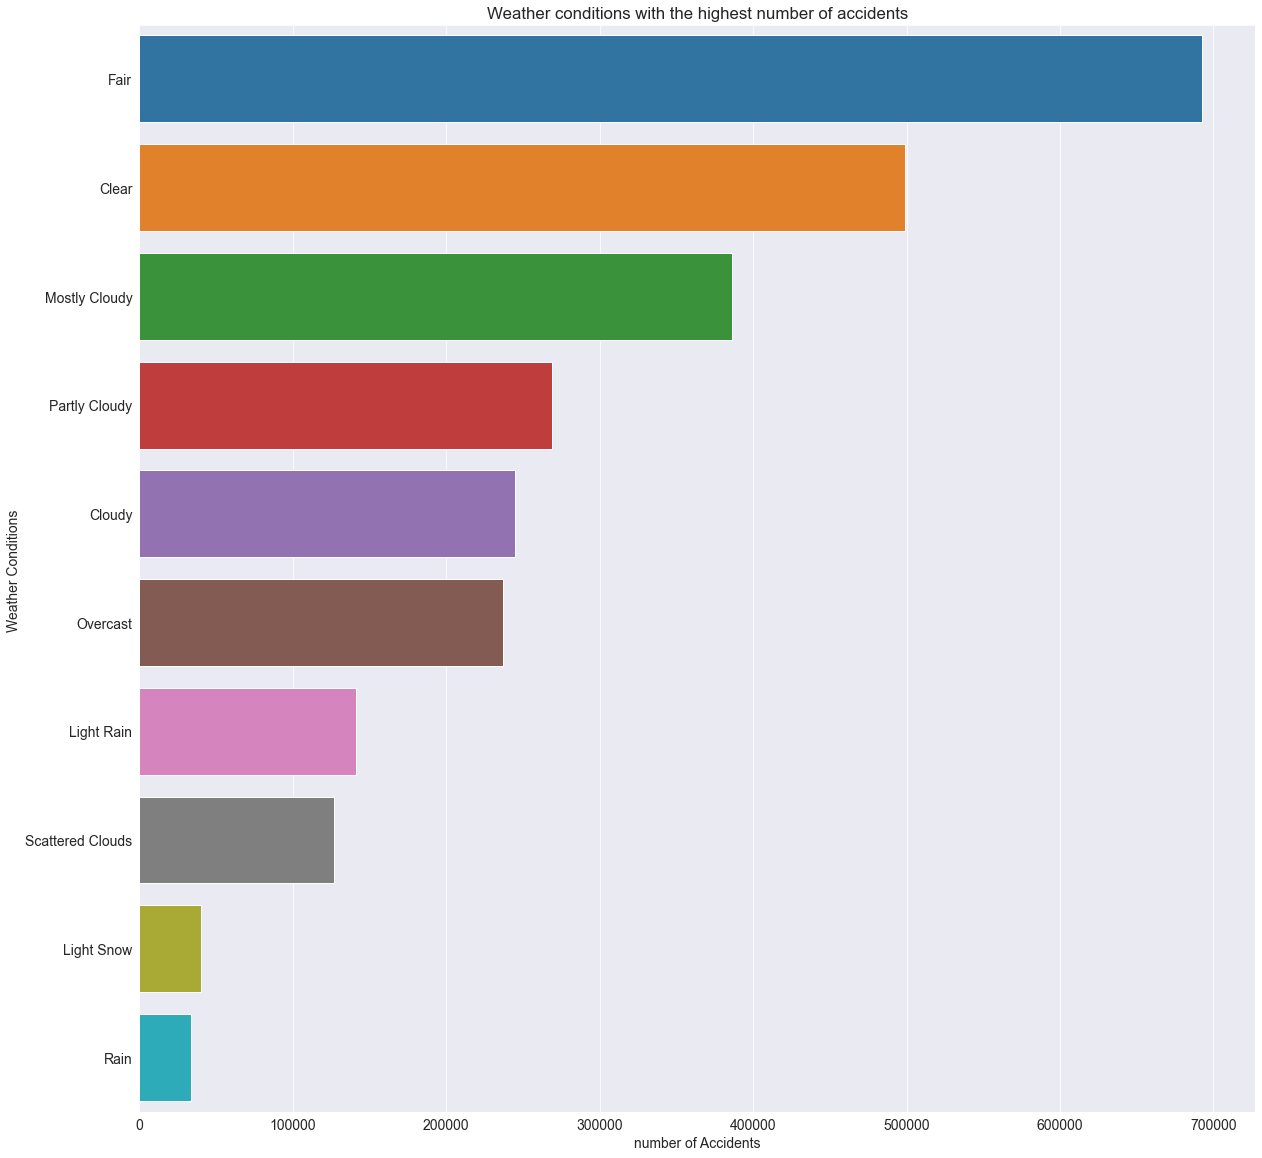

In [113]:
# plotting the weather conditions with highest number of accidents
plt.figure (figsize = (20 , 20))
sns.barplot(x = high_weather, y = high_weather.index)

plt.title("Weather conditions with the highest number of accidents")
plt.ylabel("Weather Conditions ")
plt.xlabel('number of Accidents')

### Analysis related to severity of the accidents

the severity of the accident is a number between 1 and 4  where 1 indicates the least impact on traffic

#### the distribution of severity amon accidents

In [117]:
sev_num =df["Severity"].value_counts()

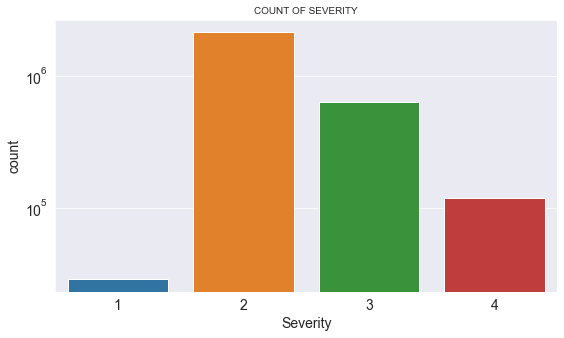

In [126]:

sns.countplot(x="Severity", data=df)
plt.yscale("log")
plt.title("COUNT OF SEVERITY",fontsize=10)
plt.show()

#### the distribution of severity among different years

In [148]:
df[["Severity","year"]]

,Severity,year
0,2,2019
1,2,2019
2,2,2020
3,2,2018
4,3,2016
...,...,...
2906605,2,2018
2906606,2,2019
2906607,2,2020
2906608,2,2019


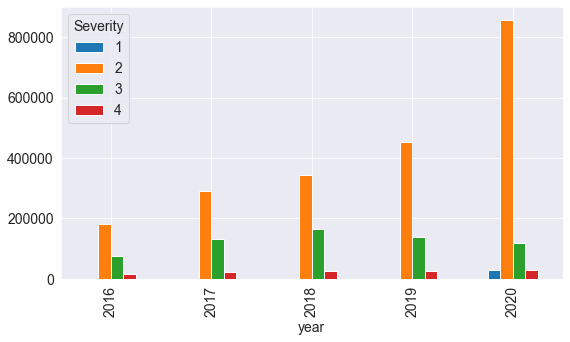

In [135]:

pd.crosstab(df["year"],df["Severity"]).plot(kind="bar");